### UCB & Thompson sampling algorithm

In [12]:
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy.stats import beta

In [13]:
t= np.linspace(0,1,10)
t,1/t

c:\users\shambhavvisen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([       inf, 9.        , 4.5       , 3.        , 2.25      ,
        1.8       , 1.5       , 1.28571429, 1.125     , 1.        ]))

In [14]:
class bandit_class:
    def __init__(self,m):
        self.m=m #true win rate
        self.mean=0 # estimated win
        self.N=0 # number of samples collected
    def choose(self):
        return npr.randn()+self.m
    def update_mean(self,x):
        self.N+=1
        self.mean=(1-(1.0/self.N))*self.mean + (1.0/self.N)*x
        
def epsilon_greedy(r1,r2,r3,eps,N):
    trails=([restuarants(r1),restuarants(r2),restuarants(r3)])
    num_times_explored=0
    num_times_exploited=0
    num_optimal =0
    optimal_j=np.argmax([b.m for b in trails])
    true_mean =trails[optimal_j]
    print(f'true_mean:{true_mean}')
    data=np.empty(N)
    for i in range(N):
        p=npr.random()
        if p < eps:
            num_times_explored +=1
            j=npr.choice(3)
        else:
            num_times_exploited +=1
            j=np.argmax([a.mean for a in trails])
        x=trails[j].choose()
        # print(f'x_N:{x}')
        trails[j].update_mean(x)
        # rho=(true_mean-trails[j])
        # print(f'rho:{rho}')
        if j==optimal_j:
            num_optimal +=1
        # for plot
        data[i]=x
        
    cumulative_avg= np.cumsum(data)/(np.arange(N)+1)
    
    print(f'Number of times explored: {num_times_explored}')
    print(f'Number of times exploited: {num_times_exploited}')
    print(f'number of optimals:{num_optimal}')
    
    plt.plot(cumulative_avg,label=f'eps:{eps}')
    plt.plot(np.ones(N)*r1)#,label=f'R1-{eps}')
    plt.plot(np.ones(N)*r2)#,label=f'R2-{eps}')
    plt.plot(np.ones(N)*r3)#,label=f'R3-{eps}')
    plt.xscale('log')
    plt.legend()
    plt.grid()
    
    for b in trails:
        print(b.mean)
    return cumulative_avg

### Thompson Sampling Algoritm



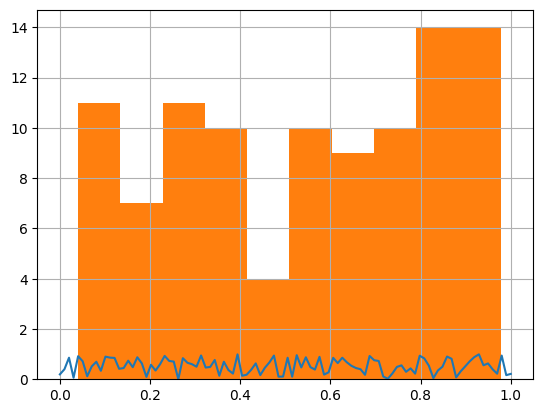

In [55]:
# pp.hist(beta.rvs(1,1,2,3,10))
pp.plot(np.linspace(0,1,100),beta.rvs(1,1,size=100))
pp.hist(beta.rvs(1,1,size=100))
pp.grid()